In [3]:
import pandas as pd

# 3* Monthly Data

In [4]:
pr_gen_fuel_monthly = pd.read_parquet("../data/eia923__monthly_puerto_rico_generation_fuel.parquet")
pr_gen_fuel_monthly

,date,plant_id_eia,plant_name_eia,prime_mover_code,energy_source_code,fuel_consumed_for_electricity_mmbtu,fuel_consumed_for_electricity_units,fuel_consumed_mmbtu,fuel_consumed_units,fuel_mmbtu_per_unit,net_generation_mwh
0,2017-04-01,61014,Pattern Santa Isabel LLC,WT,WND,101260.0,0.0,101260.0,0.0,0.0,10991.0
1,2017-04-01,61034,EcoElectrica,CA,NG,0.0,0.0,0.0,0.0,0.0,86494.0
2,2017-04-01,61034,EcoElectrica,CT,NG,1976130.0,1976130.0,1976130.0,1976130.0,1.0,189669.0
3,2017-04-01,61036,AES ILUMINA,PV,SUN,31886.0,0.0,31886.0,0.0,0.0,3461.0
4,2017-04-01,61082,AES Puerto Rico,ST,BIT,3258736.0,150103.0,3258736.0,150103.0,21.71,310975.0
...,...,...,...,...,...,...,...,...,...,...,...
5395,2025-09-01,61149,Palo Seco Plant,GT,DFO,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5396,2025-09-01,61149,Palo Seco Plant,ST,RFO,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5397,2025-09-01,61150,Cambalache Plant,GT,DFO,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5398,2025-09-01,61151,Mayaguez Plant,GT,DFO,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [5]:
monthly_index_columns = [
    "date",
    "plant_id_eia",
    "plant_name_eia",
    "prime_mover_code",
    "energy_source_code",
]
# monthly_variables = [c for c in pr_gen_fuel_monthly.columns if c not in monthly_index_columns]
# monthly_variables = pr_gen_fuel_monthly.columns[5:]

In [7]:
monthly_variables = pr_gen_fuel_monthly.columns[5:]

<Axes: xlabel='date'>

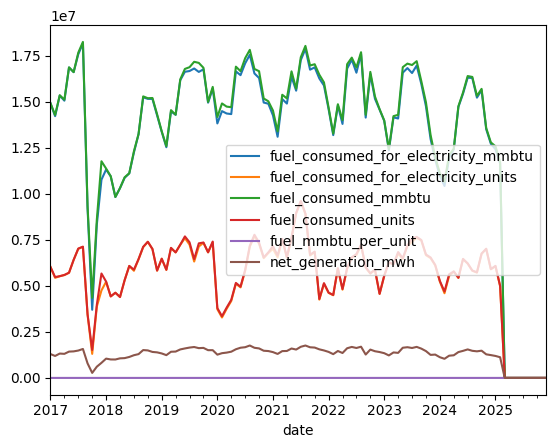

In [8]:
pr_gen_fuel_monthly
pr_gen_fuel_monthly.groupby("date")[monthly_variables].sum()
pr_gen_fuel_monthly.groupby("date")[monthly_variables].sum().plot(y=monthly_variables)

<Axes: xlabel='date'>

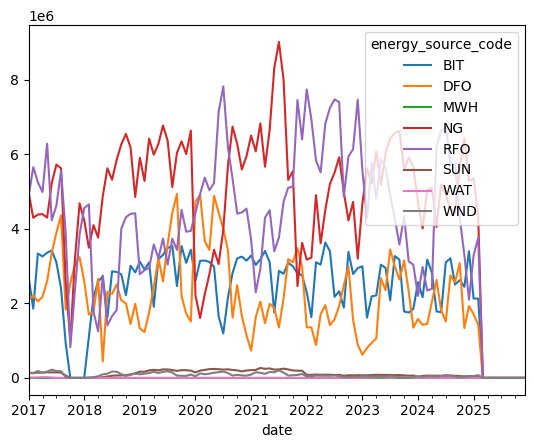

In [9]:
(
    pr_gen_fuel_monthly.groupby(["energy_source_code", "date"]).sum()
    .fuel_consumed_mmbtu
    .unstack("energy_source_code").plot()
)

<Axes: xlabel='date'>

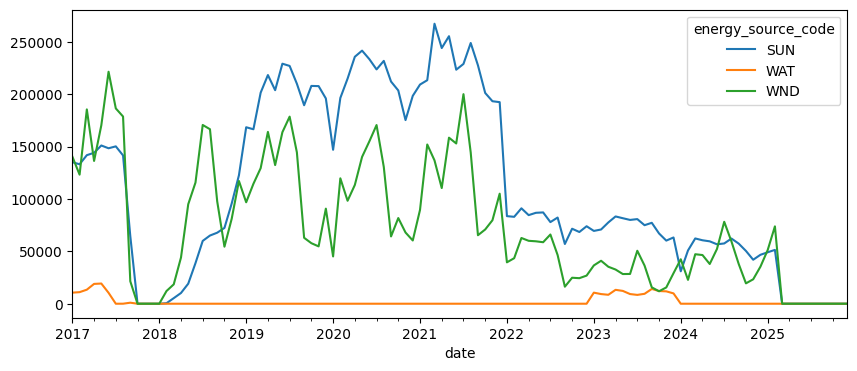

In [43]:
(
    pr_gen_fuel_monthly.loc[pr_gen_fuel_monthly.energy_source_code.isin(["SUN", "WAT", "WND"])]
    .groupby(["energy_source_code", "date"]).sum()
    .fuel_consumed_mmbtu.unstack("energy_source_code").plot()
)

In [45]:
renewables_monthly = pr_gen_fuel_monthly.loc[pr_gen_fuel_monthly.energy_source_code.isin(["SUN", "WAT", "WND"])]

<Axes: xlabel='net_generation_mwh', ylabel='fuel_consumed_mmbtu'>

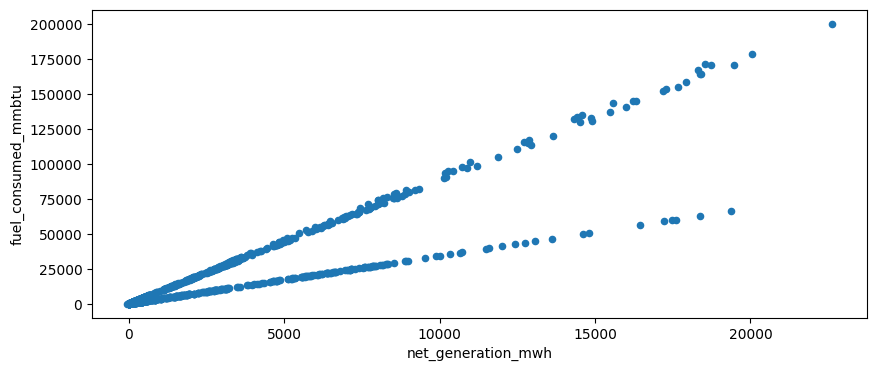

In [46]:
(
    renewables_monthly.plot
    .scatter(x="net_generation_mwh", y="fuel_consumed_mmbtu")
)

<Axes: xlabel='net_generation_mwh', ylabel='fuel_consumed_mmbtu'>

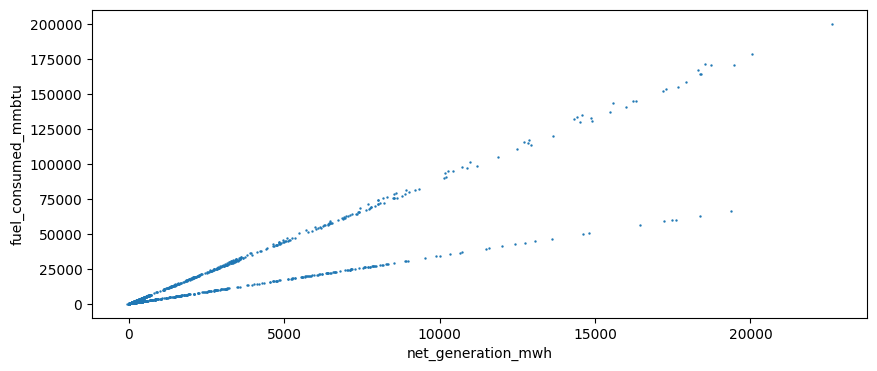

In [48]:
(
    renewables_monthly.plot
    .scatter(x="net_generation_mwh", y="fuel_consumed_mmbtu", s=0.5)
)

<Axes: xlabel='net_generation_mwh', ylabel='fuel_consumed_mmbtu'>

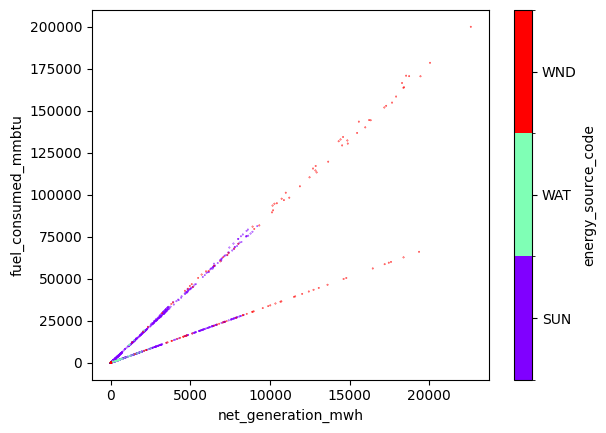

In [425]:
(
    renewables_monthly.assign(energy_source_code=pr_gen_fuel_monthly_renewables.energy_source_code.astype("category"))
    .plot.scatter(x="net_generation_mwh", y="fuel_consumed_mmbtu", s=0.1, c="energy_source_code", colormap="rainbow")
)

<Axes: xlabel='net_generation_mwh', ylabel='fuel_consumed_mmbtu'>

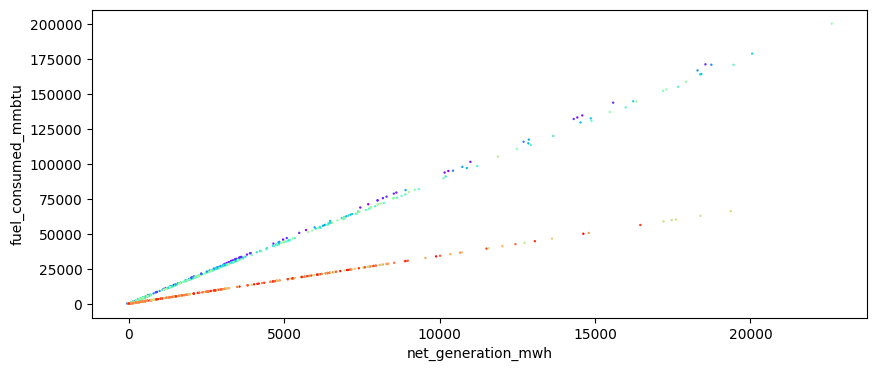

In [55]:
(
    renewables_monthly
    .plot.scatter(x="net_generation_mwh", y="fuel_consumed_mmbtu", s=0.5, c="date", colormap="rainbow")
)

<Axes: xlabel='date', ylabel='heat_rate'>

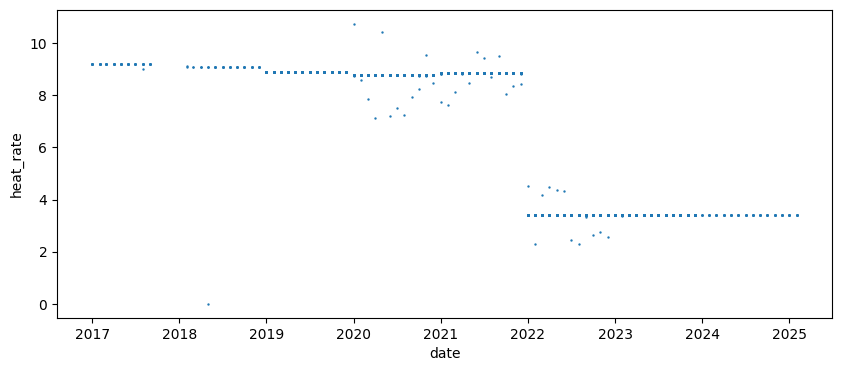

In [59]:
(
    renewables_monthly
    .assign(heat_rate=renewables_monthly.fuel_consumed_mmbtu/renewables_monthly.net_generation_mwh)
    .plot.scatter(x="date", y="heat_rate", s=0.5, c="date", colormap="rainbow")
)

<Axes: xlabel='date', ylabel='heat_rate'>

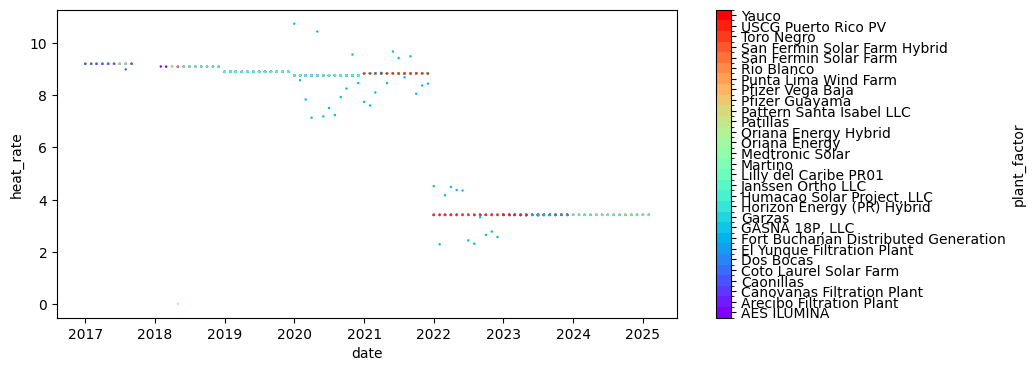

In [60]:
(
    renewables_monthly
    .assign(heat_rate=renewables_monthly.fuel_consumed_mmbtu/renewables_monthly.net_generation_mwh)
    .assign(plant_factor=renewables_monthly.plant_name_eia.astype("category"))
    .plot.scatter(x="date", y="heat_rate", s=0.5, c="plant_factor", colormap="rainbow")
)

<Axes: xlabel='date', ylabel='heat_rate'>

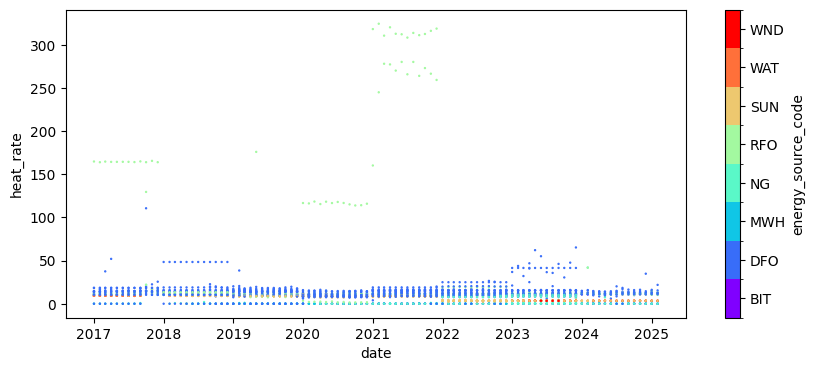

In [73]:
(
    pr_gen_fuel_monthly
    .assign(heat_rate=pr_gen_fuel_monthly.fuel_consumed_mmbtu/pr_gen_fuel_monthly.net_generation_mwh)
    .assign(energy_source_code=pr_gen_fuel_monthly.energy_source_code.astype("category"))
    # .loc[~pr_gen_fuel_monthly.energy_source_code.isin(["WND","WAT","SUN"])]
    .plot.scatter(x="date", y="heat_rate", s=0.5, c="energy_source_code", colormap="rainbow")
)

# 1: Annual data

In [23]:
pr_gen_fuel_annual = pd.read_parquet('../data/eia923__annual_puerto_rico_generation_fuel.parquet')
pr_gen_fuel_annual

,associated_combined_heat_power,census_region,elec_fuel_consumption_mmbtu,electric_fuel_consumption_quantity,energy_source_code,fuel_type_code_agg,fuel_unit,naics_code,nerc_region,nuclear_unit_id,...,plant_state,prime_mover_code,report_year,reporting_frequency_code,sector_id_eia,sector_name_eia,total_fuel_consumption_mmbtu,total_fuel_consumption_quantity,total_net_generation_mwh,data_maturity
0,N,<NA>,1024754,0,WND,WND,<NA>,22,<NA>,None,...,PR,WT,2017,<NA>,2,NAICS-22 Non-Cogen,1024754,0,111229.0,final
1,Y,<NA>,85845,82921,NG,NG,mcf,2122,<NA>,None,...,PR,CA,2017,<NA>,7,Industrial NAICS Cogen,85845,82921,752988.0,final
2,Y,<NA>,22632800,21916433,NG,NG,mcf,2122,<NA>,None,...,PR,CT,2017,<NA>,7,Industrial NAICS Cogen,23660771,22909642,2020310.0,final
3,N,<NA>,274243,0,SUN,SUN,<NA>,22,<NA>,None,...,PR,PV,2017,<NA>,2,NAICS-22 Non-Cogen,274243,0,29767.0,final
4,N,<NA>,24372958,1119122,BIT,COL,short tons,22,<NA>,None,...,PR,ST,2017,<NA>,2,NAICS-22 Non-Cogen,24372958,1119122,2315554.0,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,<NA>,323594,55792,DFO,DFO,barrels,22,<NA>,None,...,PR,GT,2025,<NA>,1,Electric Utility,323594,55792,25700.0,incremental_ytd
446,N,<NA>,1987852,315532,RFO,RFO,barrels,22,<NA>,None,...,PR,ST,2025,<NA>,1,Electric Utility,1987852,315532,192938.0,incremental_ytd
447,N,<NA>,833507,143708,DFO,DFO,barrels,22,<NA>,None,...,PR,GT,2025,<NA>,1,Electric Utility,833507,143708,65800.0,incremental_ytd
448,N,<NA>,662563,114235,DFO,DFO,barrels,22,<NA>,None,...,PR,GT,2025,<NA>,1,Electric Utility,662563,114235,60462.0,incremental_ytd


In [24]:
pr_gen_fuel_annual == "."
(pr_gen_fuel_annual == ".").any()

associated_combined_heat_power        False
census_region                         False
elec_fuel_consumption_mmbtu           False
electric_fuel_consumption_quantity    False
energy_source_code                    False
fuel_type_code_agg                    False
fuel_unit                             False
naics_code                            False
nerc_region                           False
nuclear_unit_id                       False
operator_id                           False
operator_name                         False
plant_id_eia                          False
plant_name_eia                        False
plant_state                           False
prime_mover_code                      False
report_year                           False
reporting_frequency_code              False
sector_id_eia                         False
sector_name_eia                       False
total_fuel_consumption_mmbtu          False
total_fuel_consumption_quantity       False
total_net_generation_mwh        

### Splitting by purpose: primary key

In [25]:
primary_key_columns = [
    'plant_id_eia', 'plant_name_eia', 'report_year', 'prime_mover_code', 'energy_source_code'
]
pk_sizes = pr_gen_fuel_annual.groupby(primary_key_columns).size()
pk_sizes.loc[pk_sizes>1]

plant_id_eia  plant_name_eia            report_year  prime_mover_code  energy_source_code
62410         Cervecera de Puerto Rico  2020         IC                DFO                   2
dtype: int64

In [26]:
pr_gen_fuel_annual[primary_key_columns]

,plant_id_eia,plant_name_eia,report_year,prime_mover_code,energy_source_code
0,61014,Pattern Santa Isabel LLC,2017,WT,WND
1,61034,EcoElectrica,2017,CA,NG
2,61034,EcoElectrica,2017,CT,NG
3,61036,AES ILUMINA,2017,PV,SUN
4,61082,AES Puerto Rico,2017,ST,BIT
...,...,...,...,...,...
445,61149,Palo Seco Plant,2025,GT,DFO
446,61149,Palo Seco Plant,2025,ST,RFO
447,61150,Cambalache Plant,2025,GT,DFO
448,61151,Mayaguez Plant,2025,GT,DFO


### Splitting by data type: categorical data

In [27]:
pr_gen_fuel_annual.dtypes
pr_gen_fuel_annual.dtypes[pr_gen_fuel_annual.dtypes == "string[python]"]
pr_gen_fuel_annual.dtypes[pr_gen_fuel_annual.dtypes == "string[python]"].index
list(pr_gen_fuel_annual.dtypes[pr_gen_fuel_annual.dtypes == "string[python]"].index)
category_columns = list(pr_gen_fuel_annual.dtypes[pr_gen_fuel_annual.dtypes == "string[python]"].index)
category_columns

['associated_combined_heat_power',
 'energy_source_code',
 'fuel_type_code_agg',
 'fuel_unit',
 'operator_name',
 'plant_name_eia',
 'plant_state',
 'prime_mover_code',
 'reporting_frequency_code',
 'sector_name_eia',
 'data_maturity']

In [16]:
identifier_columns = [
    "operator_name",
    "plant_name_eia",
]
category_columns = [c for c in category_columns if c not in identifier_columns]
category_columns

['associated_combined_heat_power',
 'energy_source_code',
 'fuel_type_code_agg',
 'fuel_unit',
 'plant_state',
 'prime_mover_code',
 'reporting_frequency_code',
 'sector_name_eia',
 'data_maturity']

In [28]:
pr_gen_fuel_annual[identifier_columns].describe()

,operator_name,plant_name_eia
count,450,450
unique,30,55
top,Puerto Rico Electric Pwr Authority,Aguirre Plant
freq,206,45


In [29]:
pr_gen_fuel_annual.operator_name.value_counts().sort_index()

operator_name
AES ILUMINA, LLC                                    9
AES Puerto Rico LP                                 16
AbbVie LTD                                          4
CEN Juncos Solar LLC                                1
Cervecera de Puerto Rico                            6
Directorate Of Public Works USAG Fort Buchanan      8
EcoElectrica LP                                    26
Enernet Global                                      2
Fonroche Energy America, Inc.                       9
HIMA San Pablo Bayamon                              4
HIMA San Pablo Caguas                               5
HIMA San Pablo Cupey                                5
HIMA San Pablo Fajardo                              4
HIMA San Pablo Humacao                              4
Hewlett Packard Puerto Rico B.V.                    4
Holsum de Puerto Rico, Inc.                         6
Horizon Energy LLC                                  8
Janssen Ortho LLC                                   8
Lilly del Cari

In [30]:
pr_gen_fuel_annual.fuel_unit.value_counts()

fuel_unit
barrels          237
mcf               49
megawatthours     24
short tons         9
Name: count, dtype: Int64

In [31]:
pr_gen_fuel_annual[category_columns].describe()

,associated_combined_heat_power,energy_source_code,fuel_type_code_agg,fuel_unit,operator_name,plant_name_eia,plant_state,prime_mover_code,reporting_frequency_code,sector_name_eia,data_maturity
count,450,450,450,319,450,450,450,450,349,450,450
unique,2,8,8,4,30,55,1,9,3,7,2
top,N,DFO,DFO,barrels,Puerto Rico Electric Pwr Authority,Aguirre Plant,PR,PV,M,Electric Utility,final
freq,298,188,188,237,206,45,450,99,181,227,417


In [32]:
pr_gen_fuel_annual.loc[pr_gen_fuel_annual.fuel_unit == "megawatthours", category_columns+identifier_columns].describe()

,associated_combined_heat_power,energy_source_code,fuel_type_code_agg,fuel_unit,operator_name,plant_name_eia,plant_state,prime_mover_code,reporting_frequency_code,sector_name_eia,data_maturity,operator_name,plant_name_eia
count,24,24,24,24,24,24,24,24,18,24,24,24,24
unique,2,1,1,1,4,6,1,1,3,2,2,4,6
top,N,MWH,OTH,megawatthours,Oriana Energy LLC,Oriana Energy Hybrid,PR,BA,M,NAICS-22 Non-Cogen,final,Oriana Energy LLC,Oriana Energy Hybrid
freq,22,24,24,24,9,7,24,24,12,22,22,9,7


### Splitting by type: Numeric data

In [33]:
pr_gen_fuel_annual.dtypes[pr_gen_fuel_annual.dtypes == "Int64"]

census_region                         Int64
elec_fuel_consumption_mmbtu           Int64
electric_fuel_consumption_quantity    Int64
naics_code                            Int64
nerc_region                           Int64
operator_id                           Int64
plant_id_eia                          Int64
report_year                           Int64
sector_id_eia                         Int64
total_fuel_consumption_mmbtu          Int64
total_fuel_consumption_quantity       Int64
dtype: object

In [34]:

numeric_cols = [
    "elec_fuel_consumption_mmbtu", "electric_fuel_consumption_quantity",
    "total_fuel_consumption_mmbtu", "total_fuel_consumption_quantity",
    "total_net_generation_mwh"
]
pr_gen_fuel_annual[numeric_cols].describe()


,elec_fuel_consumption_mmbtu,electric_fuel_consumption_quantity,total_fuel_consumption_mmbtu,total_fuel_consumption_quantity,total_net_generation_mwh
count,450.0,450.0,450.0,450.0,450.0
mean,3167467.055556,1326280.644444,3202204.108889,1336275.646667,303887.54596
std,7659210.791237,4947355.457551,7702911.566434,4973161.988011,683569.310339
min,0.0,0.0,0.0,0.0,-2884.0
25%,126.5,0.0,204.75,0.0,61.25
50%,46935.0,198.0,48032.5,216.0,10043.0
75%,990517.75,195039.75,990517.75,195039.75,135935.0
max,46193063.0,43993393.0,46621654.0,44401575.0,3841868.0


In [36]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4]

array([[<Axes: title={'center': 'elec_fuel_consumption_mmbtu'}>,
        <Axes: title={'center': 'electric_fuel_consumption_quantity'}>]],
      dtype=object)

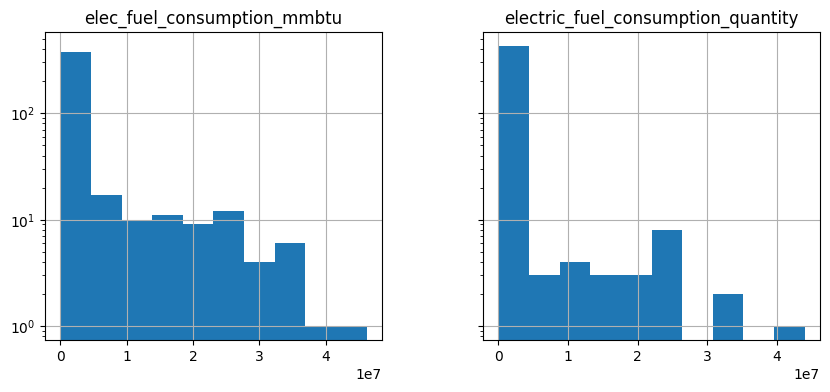

In [40]:
elec_fuel_consumption_cols = ["elec_fuel_consumption_mmbtu","electric_fuel_consumption_quantity"]
elec_fuel_consumption = (
    pr_gen_fuel_annual[
        elec_fuel_consumption_cols
    ]
)
# elec_fuel_consumption.hist()
# elec_fuel_consumption.hist(sharey=True)
elec_fuel_consumption.hist(sharey=True, log="y")

In [41]:
category_columns[0]

'associated_combined_heat_power'

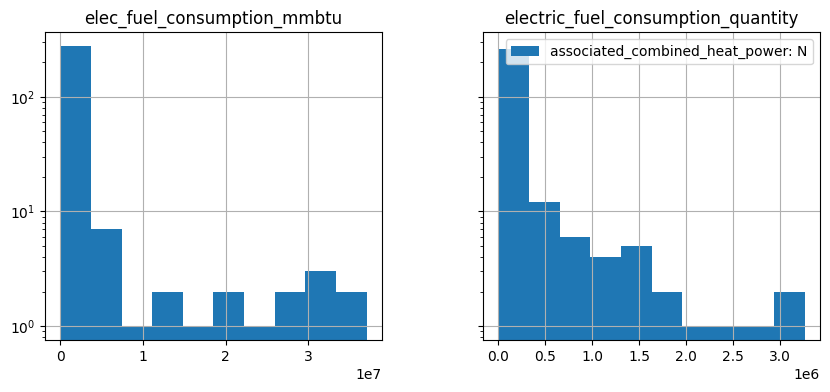

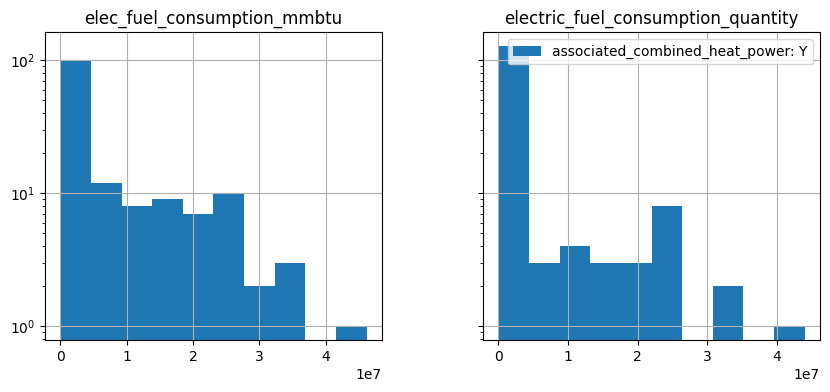

In [42]:
for gr, df in pr_gen_fuel_annual.groupby("associated_combined_heat_power"):
    axs = df.hist(column=elec_fuel_consumption_cols, sharey=True, log="y")
    axs[-1][-1].legend([f"associated_combined_heat_power: {gr}"])

# Slush

In [173]:
pr_gen_fuel_raw.dtypes.value_counts()

object     87
float64     8
Int64       1
Name: count, dtype: int64

In [175]:
pr_gen_fuel_raw.dtypes[pr_gen_fuel_raw.dtypes=="float64"]

elec_fuel_consumption_mmbtu           float64
electric_fuel_consumption_quantity    float64
naics_code                            float64
operator_id                           float64
sector_id_eia                         float64
total_fuel_consumption_mmbtu          float64
total_fuel_consumption_quantity       float64
total_net_generation_mwh              float64
dtype: object

In [172]:
with pd.option_context("display.max_rows",None):
    print(pr_gen_fuel_raw.dtypes)

associated_combined_heat_power                    object
census_region                                     object
elec_fuel_consumption_mmbtu                      float64
electric_fuel_consumption_quantity               float64
energy_source_code                                object
fuel_consumed_for_electricity_mmbtu_april         object
fuel_consumed_for_electricity_mmbtu_august        object
fuel_consumed_for_electricity_mmbtu_december      object
fuel_consumed_for_electricity_mmbtu_february      object
fuel_consumed_for_electricity_mmbtu_january       object
fuel_consumed_for_electricity_mmbtu_july          object
fuel_consumed_for_electricity_mmbtu_june          object
fuel_consumed_for_electricity_mmbtu_march         object
fuel_consumed_for_electricity_mmbtu_may           object
fuel_consumed_for_electricity_mmbtu_november      object
fuel_consumed_for_electricity_mmbtu_october       object
fuel_consumed_for_electricity_mmbtu_september     object
fuel_consumed_for_electricity_u

# 3: Extend our predecessor's work

In [2]:
pr_gen_fuel_monthly = pd.read_parquet("../data/eia923__monthly_puerto_rico_generation_fuel.parquet")
pr_gen_fuel_annual = pd.read_parquet("../data/eia923__annual_puerto_rico_generation_fuel.parquet")

NameError: name 'pd' is not defined

## Annual data

In [181]:
primary_key_columns = [
    'plant_id_eia', 'plant_name_eia', 'report_year', 'prime_mover_code', 'energy_source_code'
]
pr_gen_fuel_annual[primary_key_columns]

,plant_id_eia,plant_name_eia,report_year,prime_mover_code,energy_source_code
0,61014,Pattern Santa Isabel LLC,2017,WT,WND
1,61034,EcoElectrica,2017,CA,NG
2,61034,EcoElectrica,2017,CT,NG
3,61036,AES ILUMINA,2017,PV,SUN
4,61082,AES Puerto Rico,2017,ST,BIT
...,...,...,...,...,...
445,61149,Palo Seco Plant,2025,GT,DFO
446,61149,Palo Seco Plant,2025,ST,RFO
447,61150,Cambalache Plant,2025,GT,DFO
448,61151,Mayaguez Plant,2025,GT,DFO


In [186]:
pk_hits = pr_gen_fuel_annual[primary_key_columns].groupby(primary_key_columns).size()
pk_hits[pk_hits>1]

plant_id_eia  plant_name_eia            report_year  prime_mover_code  energy_source_code
62410         Cervecera de Puerto Rico  2020         IC                DFO                   2
dtype: int64

In [195]:
category_cols = list(pr_gen_fuel_annual.dtypes[pr_gen_fuel_annual.dtypes == "string[python]"].index)
for c in category_cols:
    print("="*40)
    print(pr_gen_fuel_annual[c].value_counts())

plant_name_eia
Aguirre Plant                           45
Central San Juan Plant                  40
Costa Sur Plant                         27
EcoElectrica                            26
San Fermin Solar Farm Hybrid            21
Palo Seco Plant                         18
AES Puerto Rico                         16
Oriana Energy Hybrid                    14
Caonillas                                9
Mayaguez Plant                           9
Cambalache Plant                         9
Pattern Santa Isabel LLC                 9
Humacao Solar Project, LLC               9
AES ILUMINA                              9
Vieques                                  8
Horizon Energy (PR) Hybrid               8
Fort Buchanan Distributed Generation     8
Janssen Ortho LLC                        8
Culebra                                  7
Daguao                                   7
Yabucoa                                  7
Vega Baja                                7
Jobos                                  

In [201]:
pr_gen_fuel_annual.dtypes

plant_id_eia                                   Int64
plant_name_eia                        string[python]
report_year                                    Int64
prime_mover_code                      string[python]
energy_source_code                    string[python]
associated_combined_heat_power        string[python]
census_region                                  Int64
elec_fuel_consumption_mmbtu                    Int64
electric_fuel_consumption_quantity             Int64
fuel_type_code_agg                    string[python]
fuel_unit                             string[python]
naics_code                                     Int64
nerc_region                                    Int64
nuclear_unit_id                               object
operator_id                                    Int64
operator_name                         string[python]
plant_state                           string[python]
reporting_frequency_code              string[python]
sector_id_eia                                 

In [198]:
numeric_cols = [
    "elec_fuel_consumption_mmbtu", "electric_fuel_consumption_quantity",
    "total_fuel_consumption_mmbtu", "total_fuel_consumption_quantity",
    "total_net_generation_mwh"
]
pr_gen_fuel_annual[numeric_cols].describe()

,elec_fuel_consumption_mmbtu,electric_fuel_consumption_quantity,total_fuel_consumption_mmbtu,total_fuel_consumption_quantity,total_net_generation_mwh
count,450.0,450.0,450.0,450.0,450.0
mean,3167467.055556,1326280.644444,3202204.108889,1336275.646667,303887.54596
std,7659210.791237,4947355.457551,7702911.566434,4973161.988011,683569.310339
min,0.0,0.0,0.0,0.0,-2884.0
25%,126.5,0.0,204.75,0.0,61.25
50%,46935.0,198.0,48032.5,216.0,10043.0
75%,990517.75,195039.75,990517.75,195039.75,135935.0
max,46193063.0,43993393.0,46621654.0,44401575.0,3841868.0


In [220]:
elec_fuel_consumption.max()

elec_fuel_consumption_mmbtu           46193063
electric_fuel_consumption_quantity    43993393
dtype: Int64

In [228]:
elec_fuel_consumption / elec_fuel_consumption.max()

,elec_fuel_consumption_mmbtu,electric_fuel_consumption_quantity
0,0.022184,0.0
1,0.001858,0.001885
2,0.489961,0.498176
3,0.005937,0.0
4,0.527632,0.025438
...,...,...
445,0.007005,0.001268
446,0.043034,0.007172
447,0.018044,0.003267
448,0.014343,0.002597


<Axes: ylabel='Frequency'>

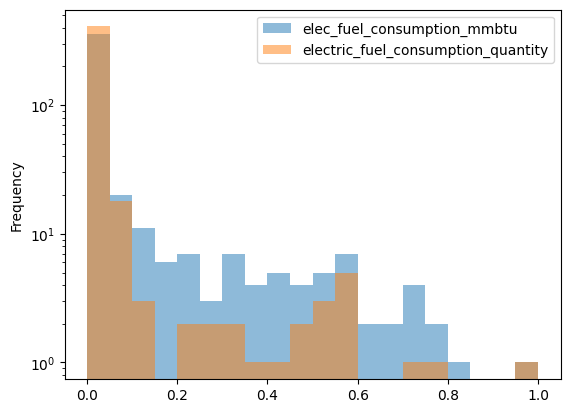

In [243]:
elec_fuel_consumption_cols = ["elec_fuel_consumption_mmbtu","electric_fuel_consumption_quantity"]
elec_fuel_consumption = (
    pr_gen_fuel_annual[["elec_fuel_consumption_mmbtu","electric_fuel_consumption_quantity"]]
)

(elec_fuel_consumption / elec_fuel_consumption.max()).plot.hist(bins=20, logy=True, alpha=0.5)


In [ ]:
import matplotlib.pyplot as plt

In [273]:
category_cols

['plant_name_eia',
 'prime_mover_code',
 'energy_source_code',
 'associated_combined_heat_power',
 'fuel_type_code_agg',
 'fuel_unit',
 'operator_name',
 'plant_state',
 'reporting_frequency_code',
 'sector_name_eia',
 'data_maturity']

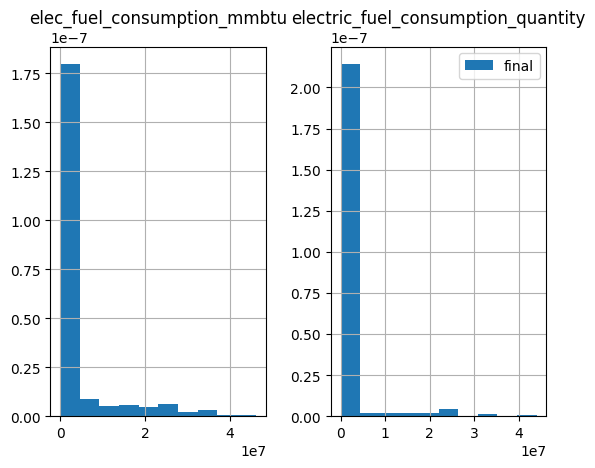

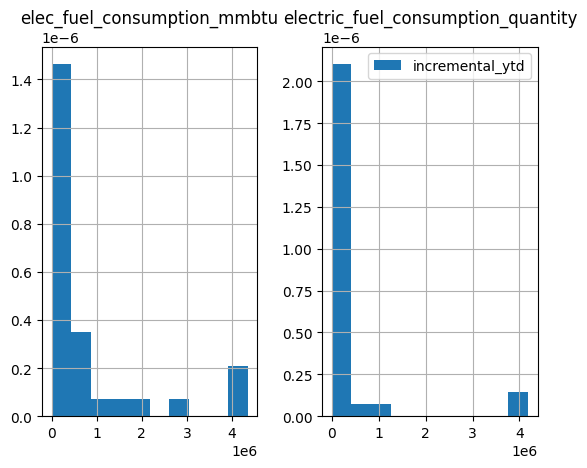

In [287]:
for gr, df in pr_gen_fuel_annual.groupby("data_maturity"):
    axs = df.hist(column=elec_fuel_consumption_cols, density=True)
    axs[-1][-1].legend([gr])

<Axes: ylabel='Frequency'>

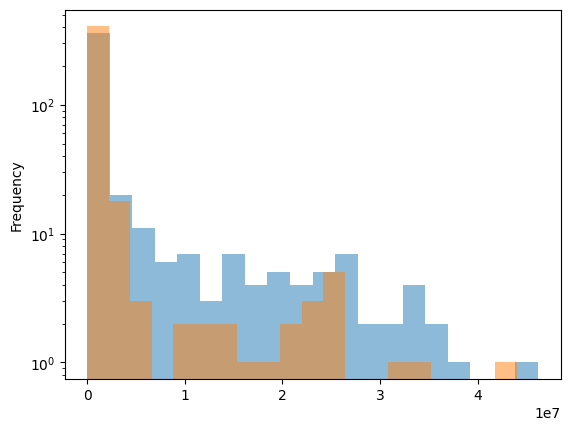

In [234]:

elec_fuel_consumption.elec_fuel_consumption_mmbtu.plot.hist(bins=20, logy=True, alpha=0.5)
elec_fuel_consumption.electric_fuel_consumption_quantity.plot.hist(bins=20, logy=True, alpha=0.5)

In [227]:
pd.DataFrame({"a":[1,2,4,8], "b":[10,20,50,100]}) / pd.DataFrame({"a":[2], "b":[5]})

,a,b
0,0.5,2.0
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN


----

## What are all the categorical columns?

In [16]:
pr_gen_fuel_raw.associated_combined_heat_power.value_counts()

associated_combined_heat_power
N    298
Y    152
Name: count, dtype: int64

In [17]:
category_columns = ["associated_combined_heat_power"]

In [20]:
pr_gen_fuel_raw.dtypes

associated_combined_heat_power         object
census_region                          object
elec_fuel_consumption_mmbtu           float64
electric_fuel_consumption_quantity    float64
energy_source_code                     object
                                       ...   
sector_name_eia                        object
total_fuel_consumption_mmbtu          float64
total_fuel_consumption_quantity       float64
total_net_generation_mwh              float64
data_maturity                          object
Length: 96, dtype: object

In [21]:
pr_gen_fuel_raw.dtypes.value_counts()

object     87
float64     8
Int64       1
Name: count, dtype: int64

In [34]:
pr_gen_fuel_raw.dtypes[pr_gen_fuel_raw.dtypes=="object"]

associated_combined_heat_power                object
census_region                                 object
energy_source_code                            object
fuel_consumed_for_electricity_mmbtu_april     object
fuel_consumed_for_electricity_mmbtu_august    object
                                               ...  
prime_mover_code                              object
report_year                                   object
reporting_frequency_code                      object
sector_name_eia                               object
data_maturity                                 object
Length: 87, dtype: object

In [35]:
pr_gen_fuel_raw.dtypes[pr_gen_fuel_raw.dtypes=="object"].index

Index(['associated_combined_heat_power', 'census_region', 'energy_source_code',
       'fuel_consumed_for_electricity_mmbtu_april',
       'fuel_consumed_for_electricity_mmbtu_august',
       'fuel_consumed_for_electricity_mmbtu_december',
       'fuel_consumed_for_electricity_mmbtu_february',
       'fuel_consumed_for_electricity_mmbtu_january',
       'fuel_consumed_for_electricity_mmbtu_july',
       'fuel_consumed_for_electricity_mmbtu_june',
       'fuel_consumed_for_electricity_mmbtu_march',
       'fuel_consumed_for_electricity_mmbtu_may',
       'fuel_consumed_for_electricity_mmbtu_november',
       'fuel_consumed_for_electricity_mmbtu_october',
       'fuel_consumed_for_electricity_mmbtu_september',
       'fuel_consumed_for_electricity_units_april',
       'fuel_consumed_for_electricity_units_august',
       'fuel_consumed_for_electricity_units_december',
       'fuel_consumed_for_electricity_units_february',
       'fuel_consumed_for_electricity_units_january',
       'fuel_

## What are all the monthly columns?

Potential strategies:

* Eyeball variable prefixes and filter `.columns` using `.startswith`
* Use month suffixes and filter `.columns` using `.endswith`

In [36]:
all_columns = list(pr_gen_fuel_raw.columns)
fuel_consumed_for_electricity_columns = []
for col in all_columns:
    if col.startswith("fuel_consumed_for_electricity"):
        fuel_consumed_for_electricity_columns.append(col)
fuel_consumed_for_electricity_columns

['fuel_consumed_for_electricity_mmbtu_april',
 'fuel_consumed_for_electricity_mmbtu_august',
 'fuel_consumed_for_electricity_mmbtu_december',
 'fuel_consumed_for_electricity_mmbtu_february',
 'fuel_consumed_for_electricity_mmbtu_january',
 'fuel_consumed_for_electricity_mmbtu_july',
 'fuel_consumed_for_electricity_mmbtu_june',
 'fuel_consumed_for_electricity_mmbtu_march',
 'fuel_consumed_for_electricity_mmbtu_may',
 'fuel_consumed_for_electricity_mmbtu_november',
 'fuel_consumed_for_electricity_mmbtu_october',
 'fuel_consumed_for_electricity_mmbtu_september',
 'fuel_consumed_for_electricity_units_april',
 'fuel_consumed_for_electricity_units_august',
 'fuel_consumed_for_electricity_units_december',
 'fuel_consumed_for_electricity_units_february',
 'fuel_consumed_for_electricity_units_january',
 'fuel_consumed_for_electricity_units_july',
 'fuel_consumed_for_electricity_units_june',
 'fuel_consumed_for_electricity_units_march',
 'fuel_consumed_for_electricity_units_may',
 'fuel_consumed

In [37]:
january_columns = []
for col in all_columns:
    if col.endswith("january"):
        january_columns.append(col)
january_columns

['fuel_consumed_for_electricity_mmbtu_january',
 'fuel_consumed_for_electricity_units_january',
 'fuel_consumed_mmbtu_january',
 'fuel_consumed_units_january',
 'fuel_mmbtu_per_unit_january',
 'net_generation_mwh_january']

### Challenge: make a list `monthly_columns` with all the monthly columns in it

In [38]:
monthly_variables = []
for col in january_columns:
    monthly_variables.append(col.replace("_january", ""))
## alternatively:
# monthly_variables = [
#    "fuel_consumed_for_electricity_mmbtu", "fuel_consumed_for_electricity_units",
#    "fuel_consumed_mmbtu", "fuel_consumed_units",
#    "fuel_mmbtu_per_unit", "net_generation_mwh",
# ]

monthly_columns = []
for col in all_columns:
    for var in monthly_variables:
        if col.startswith(var):
            monthly_columns.append(col)
monthly_columns

['fuel_consumed_for_electricity_mmbtu_april',
 'fuel_consumed_for_electricity_mmbtu_august',
 'fuel_consumed_for_electricity_mmbtu_december',
 'fuel_consumed_for_electricity_mmbtu_february',
 'fuel_consumed_for_electricity_mmbtu_january',
 'fuel_consumed_for_electricity_mmbtu_july',
 'fuel_consumed_for_electricity_mmbtu_june',
 'fuel_consumed_for_electricity_mmbtu_march',
 'fuel_consumed_for_electricity_mmbtu_may',
 'fuel_consumed_for_electricity_mmbtu_november',
 'fuel_consumed_for_electricity_mmbtu_october',
 'fuel_consumed_for_electricity_mmbtu_september',
 'fuel_consumed_for_electricity_units_april',
 'fuel_consumed_for_electricity_units_august',
 'fuel_consumed_for_electricity_units_december',
 'fuel_consumed_for_electricity_units_february',
 'fuel_consumed_for_electricity_units_january',
 'fuel_consumed_for_electricity_units_july',
 'fuel_consumed_for_electricity_units_june',
 'fuel_consumed_for_electricity_units_march',
 'fuel_consumed_for_electricity_units_may',
 'fuel_consumed

## Okay _now_ what are all the categorical columns?

In [42]:
pr_gen_fuel_nomonths = pr_gen_fuel_raw.drop(columns=monthly_columns)
pr_gen_fuel_nomonths

,associated_combined_heat_power,census_region,elec_fuel_consumption_mmbtu,electric_fuel_consumption_quantity,energy_source_code,fuel_type_code_agg,fuel_unit,naics_code,nerc_region,nuclear_unit_id,...,plant_state,prime_mover_code,report_year,reporting_frequency_code,sector_id_eia,sector_name_eia,total_fuel_consumption_mmbtu,total_fuel_consumption_quantity,total_net_generation_mwh,data_maturity
0,N,NaN,1024754.0,0.0,WND,WND,NaN,22.0,NaN,.,...,PR,WT,2017,NaN,2.0,NAICS-22 Non-Cogen,1024754.0,0.0,111229.0,final
1,Y,NaN,85845.0,82921.0,NG,NG,mcf,2122.0,NaN,.,...,PR,CA,2017,NaN,7.0,Industrial NAICS Cogen,85845.0,82921.0,752988.0,final
2,Y,NaN,22632800.0,21916433.0,NG,NG,mcf,2122.0,NaN,.,...,PR,CT,2017,NaN,7.0,Industrial NAICS Cogen,23660771.0,22909642.0,2020310.0,final
3,N,NaN,274243.0,0.0,SUN,SUN,NaN,22.0,NaN,.,...,PR,PV,2017,NaN,2.0,NAICS-22 Non-Cogen,274243.0,0.0,29767.0,final
4,N,NaN,24372958.0,1119122.0,BIT,COL,short tons,22.0,NaN,.,...,PR,ST,2017,NaN,2.0,NAICS-22 Non-Cogen,24372958.0,1119122.0,2315554.0,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,NaN,323594.0,55792.0,DFO,DFO,barrels,22.0,NaN,.,...,PR,GT,2025.0,NaN,1.0,Electric Utility,323594.0,55792.0,25700.0,incremental_ytd
446,N,NaN,1987852.0,315532.0,RFO,RFO,barrels,22.0,NaN,.,...,PR,ST,2025.0,NaN,1.0,Electric Utility,1987852.0,315532.0,192938.0,incremental_ytd
447,N,NaN,833507.0,143708.0,DFO,DFO,barrels,22.0,NaN,.,...,PR,GT,2025.0,NaN,1.0,Electric Utility,833507.0,143708.0,65800.0,incremental_ytd
448,N,NaN,662563.0,114235.0,DFO,DFO,barrels,22.0,NaN,.,...,PR,GT,2025.0,NaN,1.0,Electric Utility,662563.0,114235.0,60462.0,incremental_ytd


In [45]:
pr_gen_fuel_nomonths.dtypes[pr_gen_fuel_nomonths.dtypes=="object"].index

Index(['associated_combined_heat_power', 'census_region', 'energy_source_code',
       'fuel_type_code_agg', 'fuel_unit', 'nerc_region', 'nuclear_unit_id',
       'operator_name', 'plant_name_eia', 'plant_state', 'prime_mover_code',
       'report_year', 'reporting_frequency_code', 'sector_name_eia',
       'data_maturity'],
      dtype='object')

In [44]:
category_columns = list(pr_gen_fuel_nomonths.dtypes[pr_gen_fuel_nomonths.dtypes=="object"].index)
category_columns

['associated_combined_heat_power',
 'census_region',
 'energy_source_code',
 'fuel_type_code_agg',
 'fuel_unit',
 'nerc_region',
 'nuclear_unit_id',
 'operator_name',
 'plant_name_eia',
 'plant_state',
 'prime_mover_code',
 'report_year',
 'reporting_frequency_code',
 'sector_name_eia',
 'data_maturity']

In [49]:
pr_gen_fuel_raw[category_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   associated_combined_heat_power  450 non-null    object
 1   census_region                   0 non-null      object
 2   energy_source_code              450 non-null    object
 3   fuel_type_code_agg              450 non-null    object
 4   fuel_unit                       319 non-null    object
 5   nerc_region                     0 non-null      object
 6   nuclear_unit_id                 450 non-null    object
 7   operator_name                   450 non-null    object
 8   plant_name_eia                  450 non-null    object
 9   plant_state                     450 non-null    object
 10  prime_mover_code                450 non-null    object
 11  report_year                     450 non-null    object
 12  reporting_frequency_code        349 non-null    ob

## What is the NA situation?

In [60]:
pr_gen_fuel_raw[category_columns]

,associated_combined_heat_power,census_region,energy_source_code,fuel_type_code_agg,fuel_unit,nerc_region,nuclear_unit_id,operator_name,plant_name_eia,plant_state,prime_mover_code,report_year,reporting_frequency_code,sector_name_eia,data_maturity
0,N,NaN,WND,WND,NaN,NaN,.,Pattern Operators LP,Pattern Santa Isabel LLC,PR,WT,2017,NaN,NAICS-22 Non-Cogen,final
1,Y,NaN,NG,NG,mcf,NaN,.,EcoElectrica LP,EcoElectrica,PR,CA,2017,NaN,Industrial NAICS Cogen,final
2,Y,NaN,NG,NG,mcf,NaN,.,EcoElectrica LP,EcoElectrica,PR,CT,2017,NaN,Industrial NAICS Cogen,final
3,N,NaN,SUN,SUN,NaN,NaN,.,"AES ILUMINA, LLC",AES ILUMINA,PR,PV,2017,NaN,NAICS-22 Non-Cogen,final
4,N,NaN,BIT,COL,short tons,NaN,.,AES Puerto Rico LP,AES Puerto Rico,PR,ST,2017,NaN,NAICS-22 Non-Cogen,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,NaN,DFO,DFO,barrels,NaN,.,Puerto Rico Electric Pwr Authority,Palo Seco Plant,PR,GT,2025.0,NaN,Electric Utility,incremental_ytd
446,N,NaN,RFO,RFO,barrels,NaN,.,Puerto Rico Electric Pwr Authority,Palo Seco Plant,PR,ST,2025.0,NaN,Electric Utility,incremental_ytd
447,N,NaN,DFO,DFO,barrels,NaN,.,Puerto Rico Electric Pwr Authority,Cambalache Plant,PR,GT,2025.0,NaN,Electric Utility,incremental_ytd
448,N,NaN,DFO,DFO,barrels,NaN,.,Puerto Rico Electric Pwr Authority,Mayaguez Plant,PR,GT,2025.0,NaN,Electric Utility,incremental_ytd


In [65]:
df = pr_gen_fuel_raw[category_columns].drop(columns=["census_region", "nerc_region"])
df.loc[df.isna().any(axis="columns")]

,associated_combined_heat_power,energy_source_code,fuel_type_code_agg,fuel_unit,nuclear_unit_id,operator_name,plant_name_eia,plant_state,prime_mover_code,report_year,reporting_frequency_code,sector_name_eia,data_maturity
0,N,WND,WND,NaN,.,Pattern Operators LP,Pattern Santa Isabel LLC,PR,WT,2017,NaN,NAICS-22 Non-Cogen,final
1,Y,NG,NG,mcf,.,EcoElectrica LP,EcoElectrica,PR,CA,2017,NaN,Industrial NAICS Cogen,final
2,Y,NG,NG,mcf,.,EcoElectrica LP,EcoElectrica,PR,CT,2017,NaN,Industrial NAICS Cogen,final
3,N,SUN,SUN,NaN,.,"AES ILUMINA, LLC",AES ILUMINA,PR,PV,2017,NaN,NAICS-22 Non-Cogen,final
4,N,BIT,COL,short tons,.,AES Puerto Rico LP,AES Puerto Rico,PR,ST,2017,NaN,NAICS-22 Non-Cogen,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,N,DFO,DFO,barrels,.,Puerto Rico Electric Pwr Authority,Palo Seco Plant,PR,GT,2025.0,NaN,Electric Utility,incremental_ytd
446,N,RFO,RFO,barrels,.,Puerto Rico Electric Pwr Authority,Palo Seco Plant,PR,ST,2025.0,NaN,Electric Utility,incremental_ytd
447,N,DFO,DFO,barrels,.,Puerto Rico Electric Pwr Authority,Cambalache Plant,PR,GT,2025.0,NaN,Electric Utility,incremental_ytd
448,N,DFO,DFO,barrels,.,Puerto Rico Electric Pwr Authority,Mayaguez Plant,PR,GT,2025.0,NaN,Electric Utility,incremental_ytd


In [67]:
df[df.fuel_unit.isna()].energy_source_code.value_counts()

energy_source_code
SUN    99
WND    17
WAT    15
Name: count, dtype: int64

## What are all the non-monthly numerical columns?

In [51]:
pr_gen_fuel_nomonths.dtypes[pr_gen_fuel_nomonths.dtypes=="float64"]

elec_fuel_consumption_mmbtu           float64
electric_fuel_consumption_quantity    float64
naics_code                            float64
operator_id                           float64
sector_id_eia                         float64
total_fuel_consumption_mmbtu          float64
total_fuel_consumption_quantity       float64
total_net_generation_mwh              float64
dtype: object

In [54]:
numerical_columns = list(pr_gen_fuel_nomonths.dtypes[pr_gen_fuel_nomonths.dtypes=="float64"].index)

## `.describe()` and friends

In [55]:
pr_gen_fuel_raw[numerical_columns].describe()

,elec_fuel_consumption_mmbtu,electric_fuel_consumption_quantity,naics_code,operator_id,sector_id_eia,total_fuel_consumption_mmbtu,total_fuel_consumption_quantity,total_net_generation_mwh
count,4.500000e+02,4.500000e+02,450.000000,450.000000,450.000000,4.500000e+02,4.500000e+02,4.500000e+02
mean,3.167467e+06,1.326281e+06,194.431111,40219.960000,2.135556,3.202204e+06,1.336276e+06,3.038875e+05
std,7.659211e+06,4.947355e+06,501.512901,22774.100409,1.782575,7.702912e+06,4.973162e+06,6.835693e+05
min,0.000000e+00,0.000000e+00,22.000000,15497.000000,1.000000,0.000000e+00,0.000000e+00,-2.884000e+03
25%,1.265000e+02,0.000000e+00,22.000000,15497.000000,1.000000,2.047500e+02,0.000000e+00,6.125000e+01
50%,4.693500e+04,1.980000e+02,22.000000,60671.000000,1.000000,4.803250e+04,2.160000e+02,1.004300e+04
75%,9.905178e+05,1.950398e+05,22.000000,60725.000000,2.000000,9.905178e+05,1.950398e+05,1.359350e+05
max,4.619306e+07,4.399339e+07,2122.000000,65407.000000,7.000000,4.662165e+07,4.440158e+07,3.841868e+06


# 2: Look at how far your predecessor got

In [8]:
pr_gen_fuel_elec_final = pd.read_parquet("../data/pr_gen_fuel_elec_final.parquet")
pr_gen_fuel_elec_final

,plant_id_eia,plant_name_eia,prime_mover_code,energy_source_code,fuel_consumed_for_electricity_mmbtu,date
0,61014,Pattern Santa Isabel LLC,WT,WND,101260.0,2017-04-01
1,61034,EcoElectrica,CA,NG,0.0,2017-04-01
2,61034,EcoElectrica,CT,NG,1976130.0,2017-04-01
3,61036,AES ILUMINA,PV,SUN,31886.0,2017-04-01
4,61082,AES Puerto Rico,ST,BIT,3258736.0,2017-04-01
...,...,...,...,...,...,...
5395,61149,Palo Seco Plant,GT,DFO,<NA>,2025-09-01
5396,61149,Palo Seco Plant,ST,RFO,<NA>,2025-09-01
5397,61150,Cambalache Plant,GT,DFO,<NA>,2025-09-01
5398,61151,Mayaguez Plant,GT,DFO,<NA>,2025-09-01


In [6]:
pr_gen_fuel_elec_final.groupby("energy_source_code").fuel_consumed_for_electricity_mmbtu.describe()

,count,mean,std,min,25%,50%,75%,max
energy_source_code,,,,,,,,
BIT,98.0,2581392.010204,810869.174458,0.0,2164422.75,2827872.5,3144607.5,3631866.0
DFO,2067.0,103230.225448,282297.459883,0.0,0.0,584.0,34572.5,2079926.0
MWH,257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NG,513.0,969863.278752,1152557.96189,0.0,1285.0,102244.0,2035556.0,4701353.0
RFO,542.0,814229.062731,973552.825705,0.0,87.25,535229.0,1419885.5,4141444.0
SUN,1130.0,10605.035398,15721.212625,0.0,1058.5,3522.5,15853.0,81357.0
WAT,169.0,1262.964497,3030.959301,0.0,0.0,0.0,1348.0,19274.0
WND,172.0,46265.912791,52939.266874,0.0,0.0,28736.0,68695.0,200034.0


<Axes: xlabel='date'>

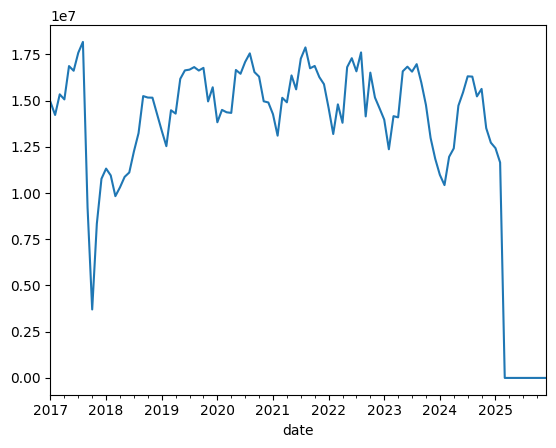

In [68]:
pr_gen_fuel_elec_final.groupby("date").fuel_consumed_for_electricity_mmbtu.sum().plot()

<Axes: xlabel='date'>

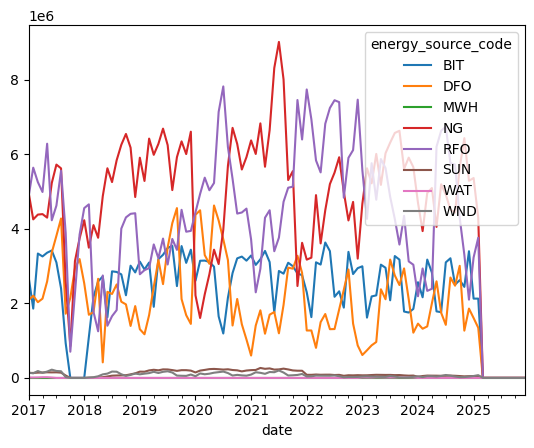

In [73]:
(
    pr_gen_fuel_elec_final.groupby(["energy_source_code","date"])
    .fuel_consumed_for_electricity_mmbtu.sum()
    .unstack("energy_source_code").plot()
)

In [ ]:
# oh look it's hurricane maria :(

<Axes: xlabel='date'>

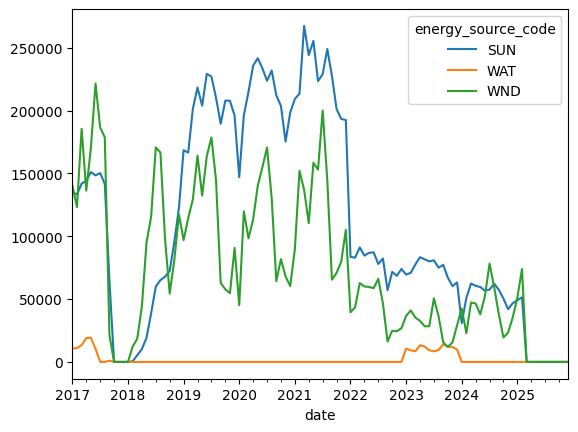

In [81]:
# what happened to renewables in 2022??
# let's look closer and then see if there's anything interesting in netgen
renewables = ["SUN", "WAT", "WND"]
(
    pr_gen_fuel_elec_final.set_index(["energy_source_code"]).loc[renewables].reset_index()
    .groupby(["energy_source_code","date"])
    .fuel_consumed_for_electricity_mmbtu.sum()
    .unstack("energy_source_code").plot()
)


In [88]:
# yep that sure is suspicious
# okay let's see if we can do what that old script did, but instead of fuel_consumed_for_electricity_mmbtu do net_generation_mwh

['fuel_consumed_for_electricity_mmbtu',
 'fuel_consumed_for_electricity_units',
 'fuel_consumed_mmbtu',
 'fuel_consumed_units',
 'fuel_mmbtu_per_unit',
 'net_generation_mwh']

# 3: Extend their work to cover the other things you found

In [89]:
[d for d in dir() if not d.startswith("_")]

['In',
 'Out',
 'all_columns',
 'category_columns',
 'col',
 'df',
 'exit',
 'fuel_consumed_for_electricity_columns',
 'get_ipython',
 'january_columns',
 'monthly_columns',
 'monthly_variables',
 'np',
 'numerical_columns',
 'open',
 'pd',
 'pr_gen_fuel_elec_final',
 'pr_gen_fuel_nomonths',
 'pr_gen_fuel_raw',
 'quit',
 'renewables',
 'var']

In [ ]:
"""
# Handle EIA null values
pr_gen_fuel = pr_gen_fuel.replace(to_replace = ".", value = pd.NA)
# Convert data types (mmbtu/units to numeric)
pr_gen_fuel = pr_gen_fuel.convert_dtypes()
"""
# Handle EIA null values
pr_gen_fuel = pr_gen_fuel_raw.replace(to_replace = ".", value = pd.NA)
# Convert data types (mmbtu/units to numeric)
pr_gen_fuel = pr_gen_fuel.convert_dtypes()

In [102]:
"""
# Pivot fuel_consumed_for_electricity columns
## Only keep the index and relevant fuel_consumed columns
column_subset_list = ['plant_id_eia', 'plant_name_eia', 'report_year', 'prime_mover_code', 'energy_source_code'] + [col for col in pr_gen_fuel.columns if "fuel_consumed_for_electricity_mmbtu" in col]
pr_gen_fuel_elec = pr_gen_fuel.loc[:, column_subset_list]

## Stack the fuel_consumed columns
pr_gen_fuel_elec_melt = pr_gen_fuel_elec.melt(id_vars = ['report_year', 'plant_id_eia', 'plant_name_eia', 'prime_mover_code', 'energy_source_code'])
"""
index_columns = ['plant_id_eia', 'plant_name_eia', 'report_year', 'prime_mover_code', 'energy_source_code']

monthly_dfs = []
for monthly_var in monthly_variables:
    column_subset_list = index_columns + [col for col in pr_gen_fuel.columns if col.startswith(monthly_var)]
    var_pivot = (
        pr_gen_fuel.loc[:, column_subset_list]
        .melt(id_vars = index_columns)
    )

    """
## Split the month from the variable
pr_gen_fuel_elec_melt[['fuel_variable', 'month']] = pr_gen_fuel_elec_melt['variable'].str.rsplit("_", n=1, expand=True)
## Create date from month and year
pr_gen_fuel_elec_melt['date'] = pd.to_datetime(pr_gen_fuel_elec_melt['month'] + pr_gen_fuel_elec_melt['report_year'].astype(str), format='%B%Y')
    """
    var_pivot[['variable', 'month']] = var_pivot['variable'].str.rsplit("_", n=1, expand=True)
    var_pivot['date'] = pd.to_datetime(var_pivot['month'] + var_pivot['report_year'].astype(str), format='%B%Y')

    """
## Drop some stuff
pr_gen_fuel_elec_clean = pr_gen_fuel_elec_melt.drop(columns = ['report_year', 'month', 'variable', 'fuel_variable'])

## Drop a bad plant
pr_gen_fuel_elec_final = pr_gen_fuel_elec_clean.loc[~((pr_gen_fuel_elec_clean.plant_id_eia == 62410) & (pr_gen_fuel_elec_clean.date.dt.year == 2020) & (pr_gen_fuel_elec_clean.value.isnull()))]

## Rename columns
pr_gen_fuel_elec_final = pr_gen_fuel_elec_final.rename(columns={'value':'fuel_consumed_for_electricity_mmbtu'})
    """
    monthly_dfs.append(
        var_pivot.drop(columns=["report_year", "month", "variable"])
        .rename(columns={"value":monthly_var})
        .set_index(["date"] + [c for c in index_columns if c != "report_year"])
    )
monthly_dfs

[                                                                                      fuel_consumed_for_electricity_mmbtu
 date       plant_id_eia plant_name_eia           prime_mover_code energy_source_code                                     
 2017-04-01 61014        Pattern Santa Isabel LLC WT               WND                                            101260.0
            61034        EcoElectrica             CA               NG                                                  0.0
                                                  CT               NG                                            1976130.0
            61036        AES ILUMINA              PV               SUN                                             31886.0
            61082        AES Puerto Rico          ST               BIT                                           3258736.0
 ...                                                                                                                   ...
 2025-09-01 6114

In [104]:
# looks promising; let's align them by the index and put all the columns side by side
pr_gen_fuel_monthly = pd.concat(monthly_dfs, axis="columns").reset_index()
pr_gen_fuel_monthly

,date,plant_id_eia,plant_name_eia,prime_mover_code,energy_source_code,fuel_consumed_for_electricity_mmbtu,fuel_consumed_for_electricity_units,fuel_consumed_mmbtu,fuel_consumed_units,fuel_mmbtu_per_unit,net_generation_mwh
0,2017-04-01,61014,Pattern Santa Isabel LLC,WT,WND,101260.0,0.0,101260.0,0.0,0.0,10991.0
1,2017-04-01,61034,EcoElectrica,CA,NG,0.0,0.0,0.0,0.0,0.0,86494.0
2,2017-04-01,61034,EcoElectrica,CT,NG,1976130.0,1976130.0,1976130.0,1976130.0,1.0,189669.0
3,2017-04-01,61036,AES ILUMINA,PV,SUN,31886.0,0.0,31886.0,0.0,0.0,3461.0
4,2017-04-01,61082,AES Puerto Rico,ST,BIT,3258736.0,150103.0,3258736.0,150103.0,21.71,310975.0
...,...,...,...,...,...,...,...,...,...,...,...
5395,2025-09-01,61149,Palo Seco Plant,GT,DFO,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5396,2025-09-01,61149,Palo Seco Plant,ST,RFO,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5397,2025-09-01,61150,Cambalache Plant,GT,DFO,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5398,2025-09-01,61151,Mayaguez Plant,GT,DFO,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


<Axes: xlabel='date'>

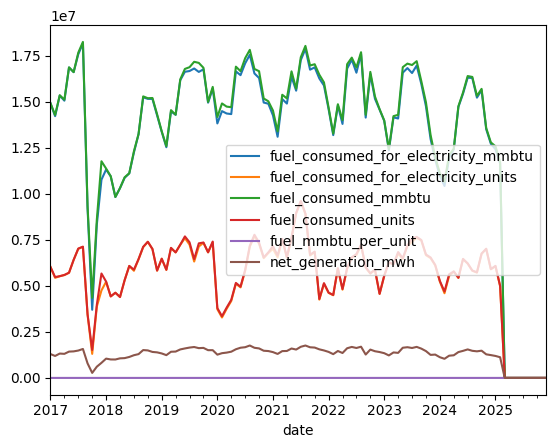

In [105]:
# yessssss okay visual check, get the total netgen etc per month
pr_gen_fuel_monthly.groupby("date").sum().plot(y=monthly_variables)

<Axes: xlabel='date'>

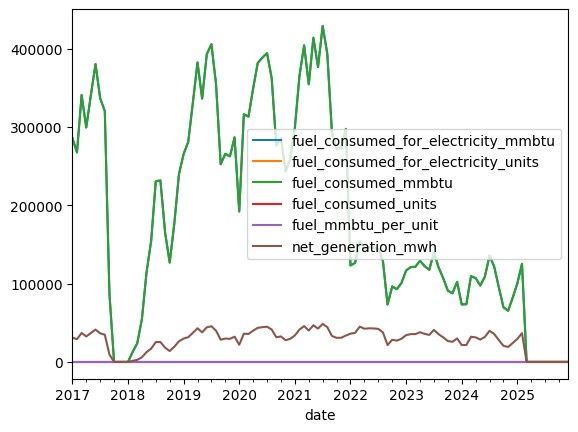

In [107]:
# looks normal; what about just renewables
(
    pr_gen_fuel_monthly.set_index(["energy_source_code"]).loc[renewables].reset_index()
    .groupby("date").sum().plot(y=monthly_variables)
)

In [109]:
# save this for more investigation
pr_gen_fuel_monthly_renewables = pr_gen_fuel_monthly.set_index(["energy_source_code"]).loc[renewables].reset_index()

<Axes: xlabel='date'>

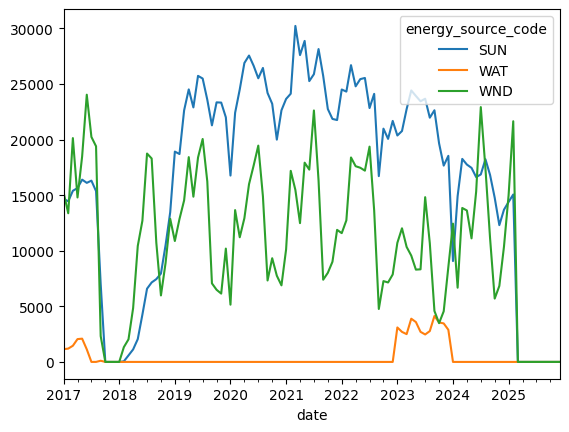

In [110]:
# break out renewables netgen by energy source
(
    pr_gen_fuel_monthly_renewables
    .groupby(["energy_source_code","date"])
    .net_generation_mwh.sum()
    .unstack("energy_source_code").plot()
)

In [151]:
# pr_gen_fuel_monthly_renewables.plant_id_eia = pr_gen_fuel_monthly_renewables.plant_id_eia.astype("category")
pr_gen_fuel_monthly_renewables.energy_source_code = pr_gen_fuel_monthly_renewables.energy_source_code.astype("category")

In [162]:
# wind looks mostly-normal; solar starts a steady decline in 2021
# but there's no dramatic dropoff anywhere
# what gives

# i wonder if some big plants opened or closed that track things way differently than the others
# what if we plot netgen x fuel mmbtu for each plant
(
    pr_gen_fuel_monthly_renewables
    .loc[:,["date","plant_id_eia","net_generation_mwh","fuel_consumed_mmbtu"]]
    .groupby(["date","plant_id_eia"])
    .sum()
    .reset_index()
    .assign(y=fuel_consumed_mmbtu/net_generation_mwh)
    .plot(y="fuel_consumed_mmbtu/net_generation_mwh",c="plant_id_eia",s=0.1,colormap="viridis")
)

/var/folders/d6/n_bvhp3n52j2f2v5g_xq47hc0000gn/T/ipykernel_97140/1790307553.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["date","plant_id_eia"])


KeyError: 'fuel_consumed_mmbtu/net_generation_mwh'

<Axes: xlabel='net_generation_mwh', ylabel='fuel_consumed_mmbtu'>

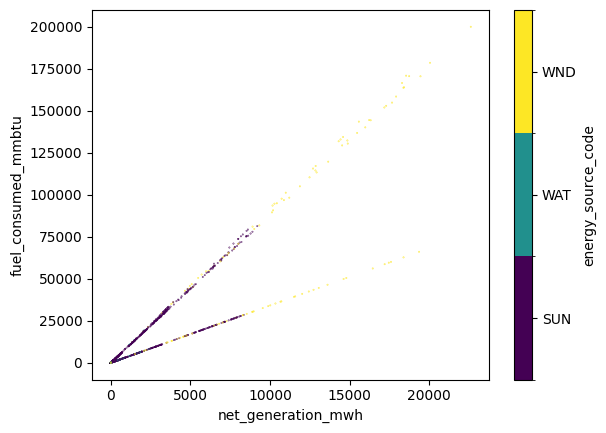

In [157]:
# ooh dramatic!
# but it doesn't look separated by plant :(
# it actually looks like there are three lines there
# and we have three energy sources
# oh no
# we'd better check
(
    pr_gen_fuel_monthly_renewables
    .loc[:,["date","plant_id_eia","energy_source_code","net_generation_mwh","fuel_consumed_mmbtu"]]
    .groupby(["date","plant_id_eia","energy_source_code"], observed=False)
    .sum()
    .reset_index()
    .plot.scatter(x="net_generation_mwh",y="fuel_consumed_mmbtu",c="energy_source_code",s=0.1,colormap="viridis")
)

<Axes: xlabel='net_generation_mwh', ylabel='fuel_consumed_mmbtu'>

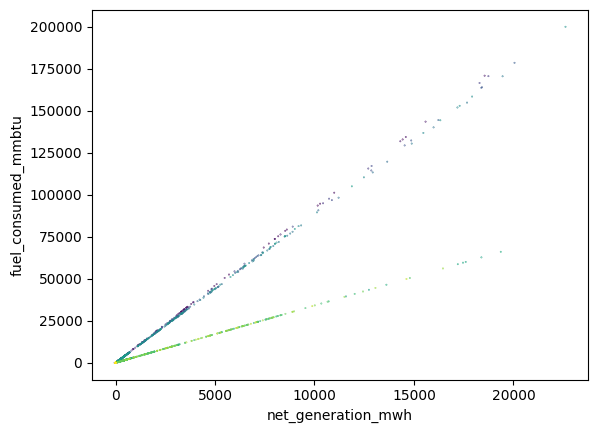

In [159]:
# ohhhhh do not like that
# it's some unknown third thing then

(
    pr_gen_fuel_monthly_renewables
    .loc[:,["date","plant_id_eia","net_generation_mwh","fuel_consumed_mmbtu"]]
    .groupby(["date","plant_id_eia"], observed=False)
    .sum()
    .reset_index()
    .plot.scatter(x="net_generation_mwh",y="fuel_consumed_mmbtu",c="date",s=0.1,colormap="viridis")
)

In [ ]:
# bingo
# that looks like a coordinated change in reporting
# or maaaaaybe they're computing mmbtus from mwh, but it's not perfect, there's some noise, so something else must also be going on